In [5]:
%matplotlib inline
import matplotlib
import pyVBF
import PyVAPlotCam as pycam
import numpy as np
import pycolor
import pylab as pl

# Plot trace

Read a vbf simulation file and plot a trace for a single PM in a single event

140563724559936


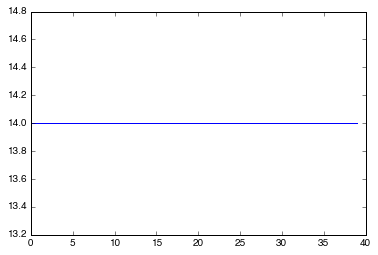

In [8]:
niceShower = 3 # event ID

f = pyVBF.VBankFileReader("/Users/jsantand/CTA/simulation/CARE200000.vbf")
vp = f.readPacket(niceShower)
ae = vp.getArrayEvent()
event = ae.getEvent(0)
event.getGPSTime()

nicePM = 9318 # PM id

t = event[nicePM]
i = [x for x in range(len(t))]
pl.plot(i, t)

# Draw all events

#### Basic functions to read camera geo and draw

In [22]:
def getCameraGeo(filename = "/Users/jsantand/CTA/simulation/camgeo.dat"):
    camgeo = np.genfromtxt(filename)
    xpix = camgeo[:,1]
    ypix = camgeo[:,2]
    idpix = camgeo[:,0]
    
    return (xpix, ypix)
    
def drawCamera(ax, charges, cmap=pl.get_cmap("gnuplot2")):
    (xpix, ypix) = getCameraGeo()
    ax.scatter(xpix, ypix, s = 30, c=charges, lw=0, cmap=cmap) # marker='s'

#### Let's stack all the image showers to show the weird grid effect that shows up in the camera plane

In [10]:
# Stacked charges
stot = np.zeros(11328)

for evid in range(f.numPackets()):
    vp = f.readPacket(evid)
    
    if vp.hasArrayEvent():
        ae = vp.getArrayEvent()
        event = ae.getEvent(0)

        sums = [np.sum(event[i]) for i in range(len(event))]
        stot = stot + sums
        

140563726066240
140563722936512
140563729228336
140563681615504
140563728965888
140563723158880
140563722977168
140563728966224
140563729296864
140563729297200
140563729260560
140563729166944
140563722470768
140563723312512
140563722473744
140563729808384
140563722838832
140563722617008
140563729158560
140563723553680
140563729332864
140563722134864
140563723755360
140563723760416
140563729333152
140563723761312
140563723127232
140563723122816
140563729817232
140563729839424
140563723767648
140563726455744
140563684712032
140563729214512
140563729215200
140563723451488
140563723452176
140563729215728
140563723768384
140563725325168
140563729216496
140563726107408
140563726081872
140563681362864
140563725325904
140563723768592
140563729220880
140563725911024
140563725299328
140563725300144
140563723769440
140563725300912
140563725911712
140563729222128
140563725302288
140563729131952
140563725912800
140563725303936
140563729140208
140563724482960
140563729143024
140563681600592
14056372

#### Plot the stacked charge distribution

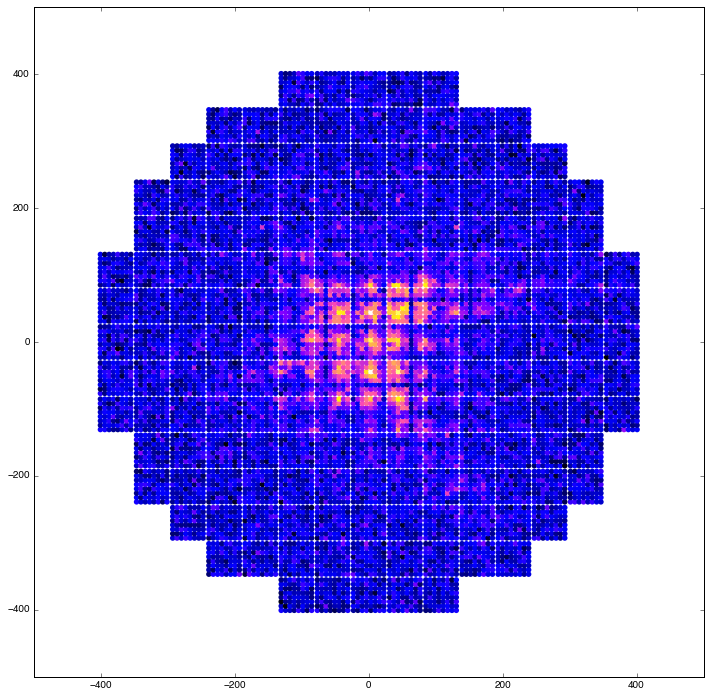

In [23]:
fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(111)    
drawCamera(ax,stot)

# Write all the shower images to image files

In [4]:
# Don't show the plots, just write them to disk
matplotlib.use('Agg')

fig = pl.figure(figsize=(12,12))
   
    
# Loop through all the packets in the vbf file
for evid in range(f.numPackets()):
    vp = f.readPacket(evid)
    
    # Only read those that had an array event (ie triggered)
    if vp.hasArrayEvent():
        ae = vp.getArrayEvent()
        event = ae.getEvent(0)
        
        ax = fig.add_subplot(111) 
        sums = [np.sum(event[i]) for i in range(len(event))]
        drawCamera(ax, sums, cmap=pl.get_cmap("plasma"))
    
        outfile = "/Users/jsantand/CTA/simulation/img/event" + str(evid) + ".png"
        fig.savefig(outfile)
        fig.clear()


print "Done!"

140563722131184
140563723138912
140563723065136
140563684766160
140563723243680
140563725816352
140563724873904
140563723422192
140563722468096
140563722518112
140563723026976
140563722296832
140563724309152
140563722969072
140563684598848
140563721958576
140563722299152
140563722399408
140563726043344
140563724039152
140563722361136
140563681433600
140563684623024
140563727207216
140563722323248
140563722370192
140563725864560
140563724316304
140563684676480
140563723243360
140563725083312
140563720955280
140563725377136
140563727151232
140563727383264
140563725551648
140563727439920
140563725450016
140563724969648
140563724387328
140563725083568
140563726177712
140563722501712
140563726768240
140563724860864
140563727724224
140563726952256
140563725546896
140563723432064
140563723250016
140563724407536
140563727753600
140563726870048
140563681494688
140563684670256
140563725361664
140563723490496
140563684731664
140563725721168
140563727589136
140563724346736
140563725704896
14056372

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
